# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Building a machine learning model using the ChEMBL bioactivity data. <br> 
Part 5- Comparing several ML algorithms for build regression models of AKT inhibitors.



## **1. Import libraries**

In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [ ]:
df = pd.read_csv('akt_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(3464, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(3464, 139)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
#models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
#models_test,predictions_test = clf.fit(X_test, X_test, Y_test, Y_test)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:41<00:00,  1.02it/s]


In [ ]:
# Performance table of the training set (80% subset)
train['Models'] = train.index
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,Models
Model,,,,,
HistGradientBoostingRegressor,0.52,0.62,0.81,2.54,HistGradientBoostingRegressor
LGBMRegressor,0.52,0.62,0.81,0.35,LGBMRegressor
RandomForestRegressor,0.50,0.60,0.82,3.47,RandomForestRegressor
SVR,0.50,0.60,0.82,2.45,SVR
XGBRegressor,0.49,0.60,0.83,1.51,XGBRegressor
BaggingRegressor,0.49,0.59,0.83,0.42,BaggingRegressor
NuSVR,0.48,0.58,0.84,2.04,NuSVR
MLPRegressor,0.43,0.54,0.88,5.35,MLPRegressor
KNeighborsRegressor,0.42,0.54,0.88,0.67,KNeighborsRegressor


In [ ]:
train.to_csv('trained_model_performance.csv', index=False)

In [ ]:
# Performance table of the test set (20% subset)
test['Models'] = test.index
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,Models
Model,,,,,
HistGradientBoostingRegressor,0.52,0.62,0.81,2.54,HistGradientBoostingRegressor
LGBMRegressor,0.52,0.62,0.81,0.35,LGBMRegressor
RandomForestRegressor,0.50,0.60,0.82,3.47,RandomForestRegressor
SVR,0.50,0.60,0.82,2.45,SVR
XGBRegressor,0.49,0.60,0.83,1.51,XGBRegressor
BaggingRegressor,0.49,0.59,0.83,0.42,BaggingRegressor
NuSVR,0.48,0.58,0.84,2.04,NuSVR
MLPRegressor,0.43,0.54,0.88,5.35,MLPRegressor
KNeighborsRegressor,0.42,0.54,0.88,0.67,KNeighborsRegressor


In [ ]:
test.to_csv('test_model_performance.csv', index=False)

## **5. Data visualization of model performance**

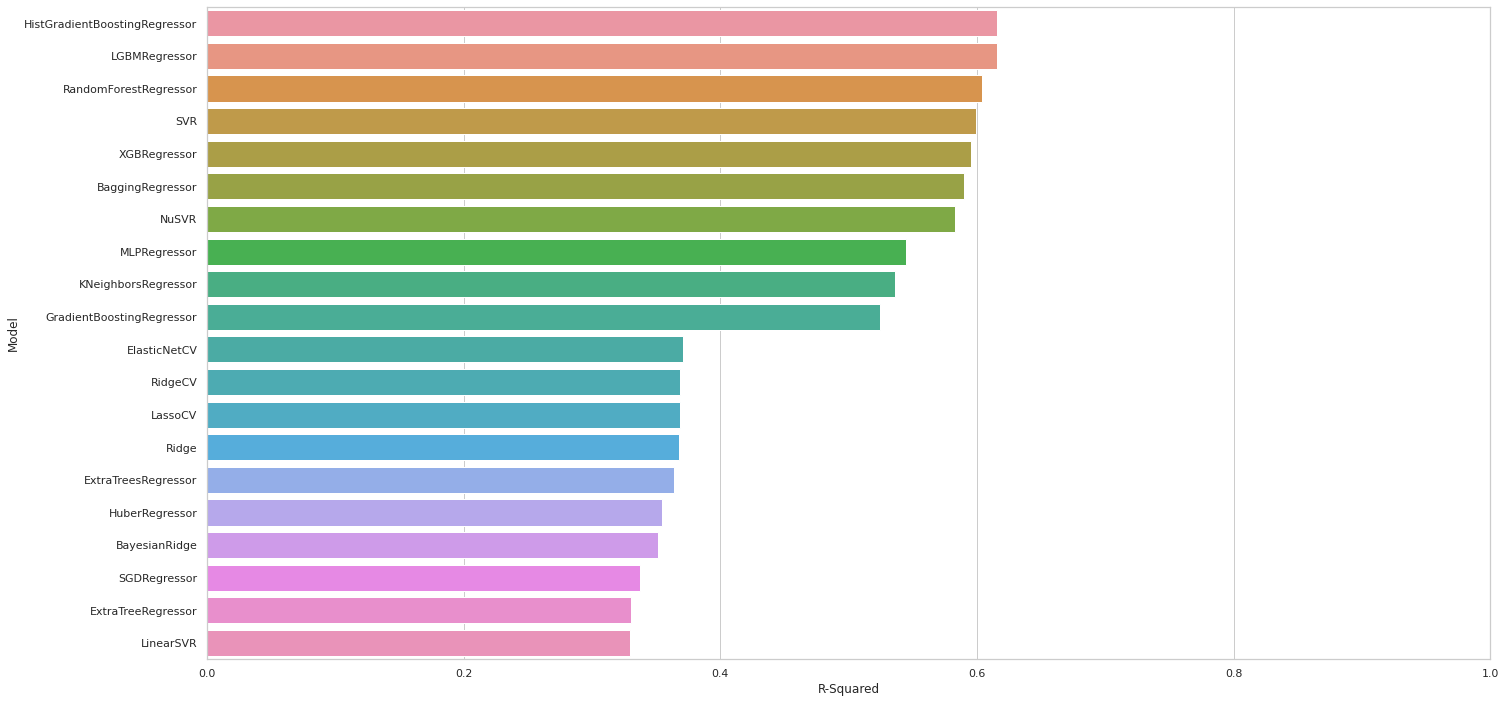

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(23, 12))
sns.set_theme(style="whitegrid")
a = train.head(20)
ax = sns.barplot(y=a.index, x="R-Squared", data=a)
ax.set(xlim=(0, 1))

plt.savefig('barplot_R_squared_values_train.pdf')

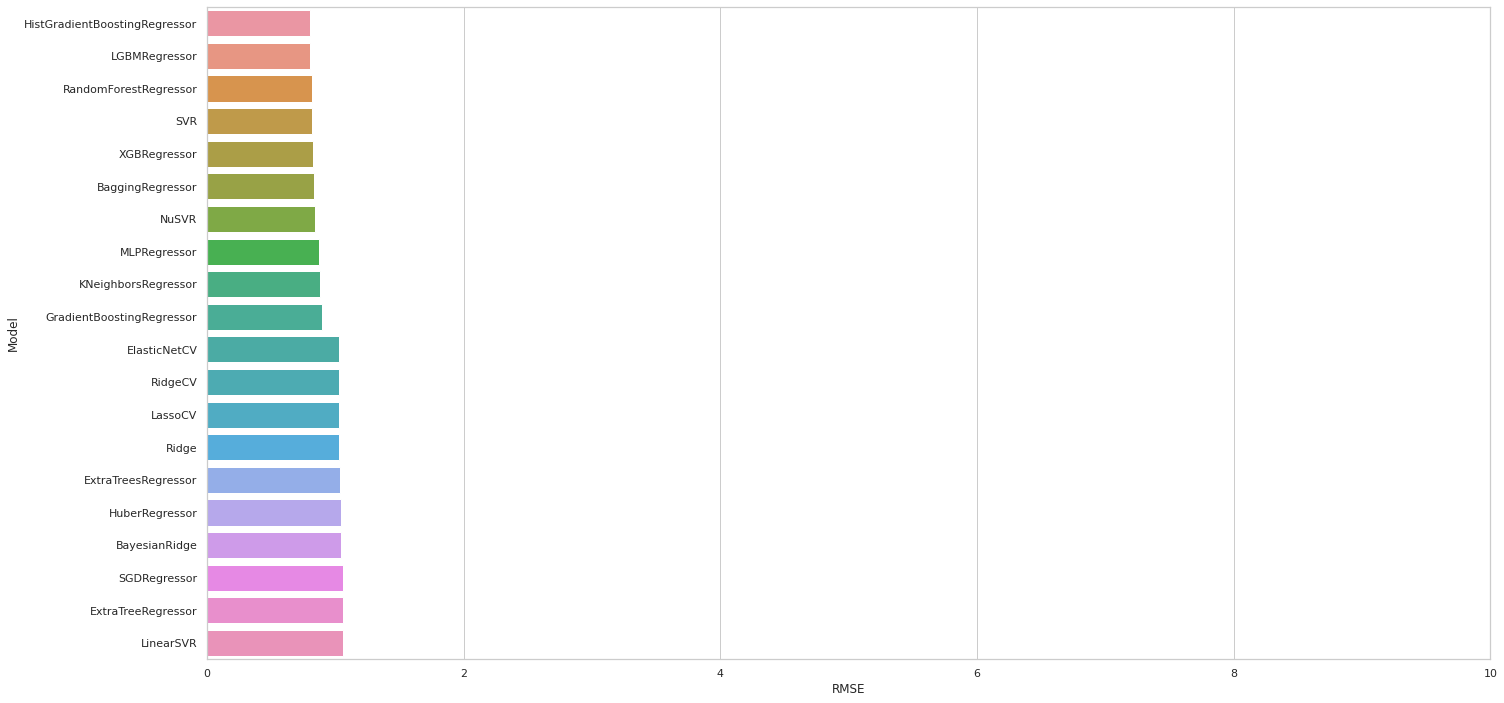

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(23, 12))
sns.set_theme(style="whitegrid")
a = train.head(20)
ax = sns.barplot(y=a.index, x="RMSE", data=a)
ax.set(xlim=(0, 10))

plt.savefig('plot_RMSEvalues_train.pdf')

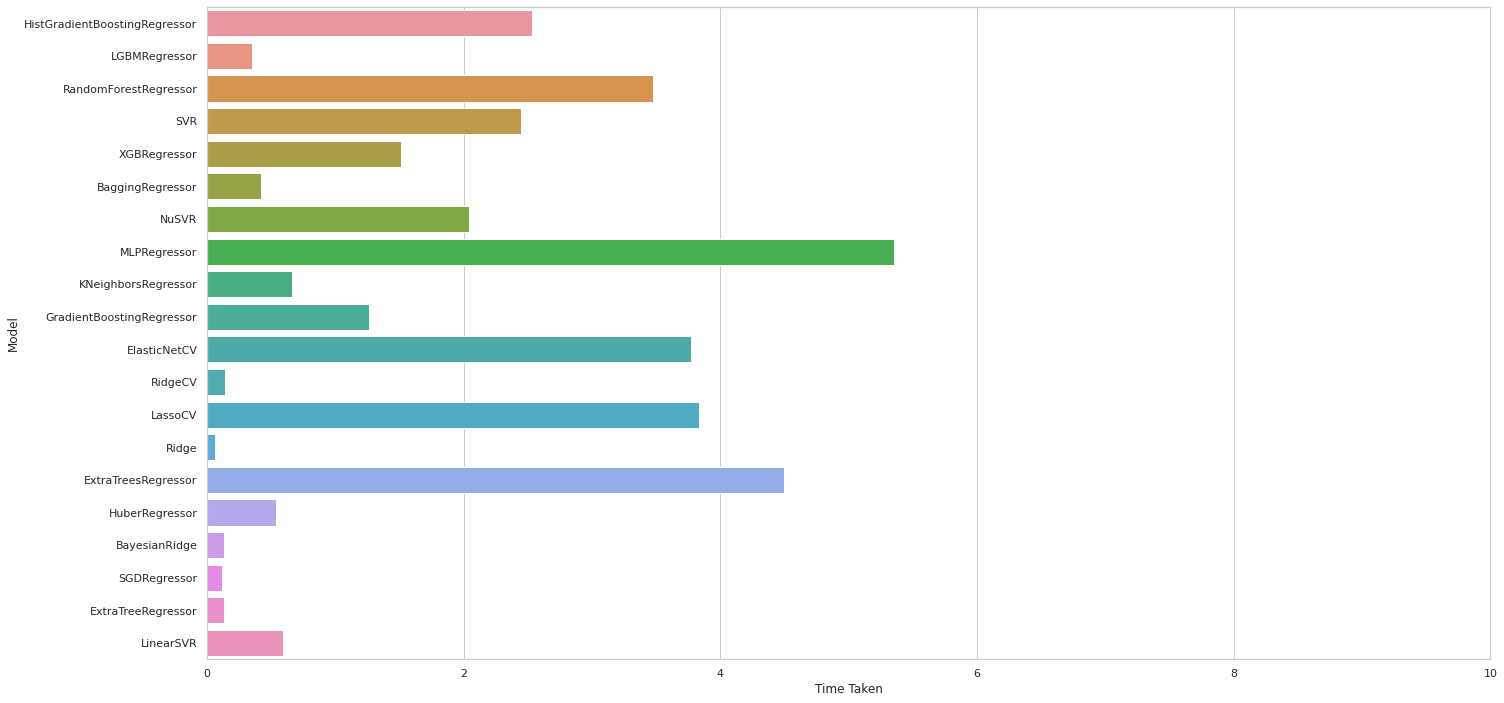

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(23, 12))
sns.set_theme(style="whitegrid")
a = train.head(20)
ax = sns.barplot(y=a.index, x="Time Taken", data=a)
ax.set(xlim=(0, 10))
plt.savefig('plot_calculationTime_trained.pdf')

In [ ]:

! zip -r step5.zip . -i *.pdf *.csv

  adding: plot_calculationTime_trained.pdf (deflated 31%)
  adding: test_model_performance.csv (deflated 52%)
  adding: plot_RMSEvalues_train.pdf (deflated 31%)
  adding: barplot_R_squared_values_train.pdf (deflated 31%)
  adding: trained_model_performance.csv (deflated 52%)
  adding: akt_06_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 96%)
